# Исследование объявлений о продаже квартир


Изучим данные, которые переданы для работы над анализом.

## Импортируем библиотеку pandas 

In [1]:
import pandas as pd

Прочитаем файл *real_estate_data.csv* и сохраним его в переменной *df*. 

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

Выведим первые 25 строчек таблицы, чтобы ознакомиться с информацией.

In [3]:
pd.set_option('display.max_columns', None)
df.head(25)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Рассмотрим полученную информацию подробнее.

Всего в таблице 22 столбца, тип данных у столбцов - *float64*, *int64*, *object*, *bool*.

Подробно разберём, какие в df столбцы и какую информацию они содержат:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

# Переработка данных

Проверим корректность в названиях столбцов.

In [5]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

В названиях столбцов нету пробелов или же ошибок, с данными можно работать корректно.

Проверим наличие дубликатов в данных.

In [6]:
df.duplicated().sum()

0

Выведим пропущенные значения в столбцах.

In [7]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Видим, что у некоторых столбцах более 10 000 - 20 000 пропущенных значений, заменять их на среднее или медианное значение будут не корректно, так как это может исказить данные, поэтому пока оставим с пропусками.

В данном случае пропуски могут быть связанны с тем, что нету точных данных по расстоянию квартир к центру/аэропорту или же сами квартиры находятся слишком далеко от данных параметров; не во всех квартирах могут быть балконы, всё зависит от плана и года застройки; данные по количеству дней объявления так же могут быть пропущены из-за того, что его не удаляли или же забыли убрать из поиска; так же некоторые параметры могли быть пропущены в следствии того, что к примеру это могли бы быть новострои и до конца всех параметров и продавцов просто нету.

Переведём столбец апартаментов в тип *bool*.

In [8]:
df['is_apartment'] = df['is_apartment'].astype(bool)

Тип изменён и теперь столбец из корретных типом.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000

Создадим цикл для перечня других столбцов, чтобы изменить тип данных из float на int, но применим только к целочисленным значениям, а те, что действительно содержат данные в типе float - оставим в том же типе.

In [10]:
columns_to_integer = ['last_price', 'floors_total', 'balcony', 'cityCenters_nearest', 'airports_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest']

for column in columns_to_integer:
    df[column] = df[column].astype(pd.Int32Dtype())

Проверим снова тип данных столбцов.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null Int32
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null Int32
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null Int32
locality_name           23650 non-null object
airports_nearest        18157 non-null Int32
cityCenters_nearest     18180 non-null Int32
parks_around3000        18181 non-null Int32
parks_nearest           8079 non-null Int32
ponds_around3000        18181 

Видим, что необходимые столбцы переведены в тип int.

Выведим первые 10 строчек таблицы для перепроверки.

In [12]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,True,False,False,25.00,NaN,Санкт-Петербург,18863,16028,1,482,2,755,NaN
1,7,3350000,40.40,2018-12-04T00:00:00,1,NaN,11,18.60,1,True,False,False,11.00,2,посёлок Шушары,12817,18603,0,NaN,0,NaN,81.0
2,10,5196000,56.00,2015-08-20T00:00:00,2,NaN,5,34.30,4,True,False,False,8.30,0,Санкт-Петербург,21741,13933,1,90,2,574,558.0
3,0,64900000,159.00,2015-07-24T00:00:00,3,NaN,14,NaN,9,True,False,False,NaN,0,Санкт-Петербург,28098,6800,2,84,3,234,424.0
4,2,10000000,100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,True,False,False,41.00,NaN,Санкт-Петербург,31856,8098,2,112,1,48,121.0
5,10,2890000,30.40,2018-09-10T00:00:00,1,NaN,12,14.40,5,True,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000,37.30,2017-11-02T00:00:00,1,NaN,26,10.60,6,True,False,False,14.40,1,посёлок Парголово,52996,19143,0,NaN,0,NaN,155.0
7,5,7915000,71.60,2019-04-18T00:00:00,2,NaN,24,NaN,22,True,False,False,18.90,2,Санкт-Петербург,23982,11634,0,NaN,0,NaN,NaN
8,20,2900000,33.16,2018-05-23T00:00:00,1,NaN,27,15.43,26,True,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000,61.00,2017-02-26T00:00:00,3,2.50,9,43.60,7,True,False,False,6.50,2,Санкт-Петербург,50898,15008,0,NaN,0,NaN,289.0


Добавим в таблицу новый столбец, который заполним данными цены за квадратный метр.

In [13]:
def meter_price(row):
    last_price = row['last_price']
    total_area = row['total_area']
    return last_price/total_area

In [14]:
df['meter_price'] = df.apply(meter_price, axis = 1)

Добавим в таблицу новый столбец, который заполним данными соотношения площади кухни к общей.

In [15]:
def total_kitchen(row):
    kitchen_area = row['kitchen_area']
    total_area = row['total_area']
    return kitchen_area/total_area

In [16]:
df['total_kitchen'] = df.apply(total_kitchen, axis = 1)

Добавим в таблицу новый столбец, который заполним данными соотношения площади жилой к общей.

In [17]:
def total_living(row):
    living_area = row['living_area']
    total_area = row['total_area']
    return living_area/total_area

In [18]:
df['total_living'] = df.apply(total_living, axis = 1)

Перепроверим новые столбцы, отобразив первые 2 строчки таблицы.

In [19]:
df.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,total_kitchen,total_living
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.7,16,51.0,8,True,False,False,25.0,NaN,Санкт-Петербург,18863,16028,1,482,2,755,NaN,120370.370370,0.231481,0.472222
1,7,3350000,40.4,2018-12-04T00:00:00,1,NaN,11,18.6,1,True,False,False,11.0,2,посёлок Шушары,12817,18603,0,NaN,0,NaN,81.0,82920.792079,0.272277,0.460396


Посмотрим как выглядит формат даты публикации.

In [20]:
df['first_day_exposition'].head(2)

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
Name: first_day_exposition, dtype: object

Отформатируем столбец с данными и переведем для более удобной работы с ним.

In [21]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')



Столбец теперь выглядит корректно и удобный для работы.

In [22]:
df['first_day_exposition'].head(2)

0   2019-03-07
1   2018-12-04
Name: first_day_exposition, dtype: datetime64[ns]

Добавим отдельно день/месяц/год столбцами в таблицу.

In [23]:
df['day'] = pd.DatetimeIndex(df['first_day_exposition']).day
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year

Выведим первые строчки для перепроверки столбцов.

In [24]:
df.head(4)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,total_kitchen,total_living,day,month,year
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,True,False,False,25.0,NaN,Санкт-Петербург,18863,16028,1,482,2,755,NaN,120370.370370,0.231481,0.472222,7,3,2019
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,True,False,False,11.0,2,посёлок Шушары,12817,18603,0,NaN,0,NaN,81.0,82920.792079,0.272277,0.460396,4,12,2018
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558.0,92785.714286,0.148214,0.612500,20,8,2015
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,True,False,False,NaN,0,Санкт-Петербург,28098,6800,2,84,3,234,424.0,408176.100629,NaN,NaN,24,7,2015


Вызовим функцию, в которой распределим этаж, на котором расположена квартира; варианты — первый, последний, другой.

In [25]:
def floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == floors_total:
        return 'последний'
    if floor == 1:
        return 'первый'
    else:
        return 'другой'

In [26]:
df['floor_type'] = df.apply(floor_type, axis = 1)

Вызовим функцию, в которой, для удобства, разделим отдельно категорию "пригород" и "Санкт-Петербург".

In [27]:
def prigorod(city_name):
    city = city_name['locality_name']
    if city != 'Санкт-Петербург':
        return 'пригород'    
    if city == 'Санкт-Петербург':
        return 'Санкт-Петербург'

In [28]:
df['prigorod_city'] = df.apply(prigorod, axis = 1)

Вызовим первые строки для перепроверки новых столбцов.

In [29]:
df.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,total_kitchen,total_living,day,month,year,floor_type,prigorod_city
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,True,False,False,25.0,NaN,Санкт-Петербург,18863,16028,1,482,2,755,NaN,120370.370370,0.231481,0.472222,7,3,2019,другой,Санкт-Петербург
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,True,False,False,11.0,2,посёлок Шушары,12817,18603,0,NaN,0,NaN,81.0,82920.792079,0.272277,0.460396,4,12,2018,первый,пригород
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558.0,92785.714286,0.148214,0.612500,20,8,2015,другой,Санкт-Петербург


Подсчитаем количество квартир в зависимости от этажности.

In [30]:
floor_first = df[(df['floor'] == 1)] 
floor_last = df[(df['floor'] == df['floors_total'])]
df['floor_type'] = 'другие'
df['floor_type'] = df['floor_type'].where(~df.index.isin(floor_first.index), 'первый')
df['floor_type'] = df['floor_type'].where(~df.index.isin(floor_last.index), 'последний')
df['floor_type'].value_counts()

другие       17446
последний     3361
первый        2892
Name: floor_type, dtype: int64

# Анализ полученных данных

Выведим общие статистические данные по таблице.

In [31]:
pd.options.display.float_format = '{:,.1f}'.format

df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,total_kitchen,total_living,day,month,year
count,"23,699.0","23,699.0","23,699.0","23,699.0","14,504.0","23,613.0","21,796.0","23,699.0","21,421.0","12,180.0","18,157.0","18,180.0","18,181.0","8,079.0","18,181.0","9,110.0","20,518.0","23,699.0","21,421.0","21,796.0","23,699.0","23,699.0","23,699.0"
mean,9.9,"6,541,548.8",60.3,2.1,2.8,10.7,34.5,5.9,10.6,1.2,"28,793.7","14,191.3",0.6,490.8,0.8,518.0,180.9,"99,421.7",0.2,0.6,15.5,6.4,"2,017.4"
std,5.7,"10,887,013.3",35.7,1.1,1.3,6.6,22.0,4.9,5.9,1.1,"12,630.9","8,608.4",0.8,342.3,0.9,277.7,219.7,"50,306.8",0.1,0.1,8.6,3.5,1.0
min,0.0,"12,190.0",12.0,0.0,1.0,1.0,2.0,1.0,1.3,0.0,0.0,181.0,0.0,1.0,0.0,13.0,1.0,111.8,0.0,0.0,1.0,1.0,"2,014.0"
25%,6.0,"3,400,000.0",40.0,1.0,2.5,5.0,18.6,2.0,7.0,0.0,"18,585.0","9,238.0",0.0,288.0,0.0,294.0,45.0,"76,585.5",0.1,0.5,8.0,3.0,"2,017.0"
50%,9.0,"4,650,000.0",52.0,2.0,2.6,9.0,30.0,4.0,9.1,1.0,"26,726.0","13,098.5",0.0,455.0,1.0,502.0,95.0,"95,000.0",0.2,0.6,15.0,6.0,"2,017.0"
75%,14.0,"6,800,000.0",69.9,3.0,2.8,16.0,42.3,8.0,12.0,2.0,"37,273.0","16,293.0",1.0,612.0,1.0,729.0,232.0,"114,256.3",0.2,0.6,23.0,10.0,"2,018.0"
max,50.0,"763,000,000.0",900.0,19.0,100.0,60.0,409.7,33.0,112.0,5.0,"84,869.0","65,968.0",3.0,"3,190.0",3.0,"1,344.0","1,580.0","1,907,500.0",0.8,1.0,31.0,12.0,"2,019.0"


Видим, что в некоторых столбцах, к примеру цены квартиры есть большой выброс, так же как и в стоимости квадратного метра.

##  Типичные параметры продаваемых квартир 

Выведим график распределения площади квартиры к цене.

In [32]:
df.plot(y='total_area', x = 'last_price', ylim=(0, 500), kind='scatter', grid=True, figsize = (12, 6))


Видим, что основаня часть данных сосредоточена таким образом: квартиры квадратурой от 30 - 200 метров и стоимостью 1 - 5 млн рублей.

Посмотрим какое количество квартир имеют чаще всего встречаемую площадь.

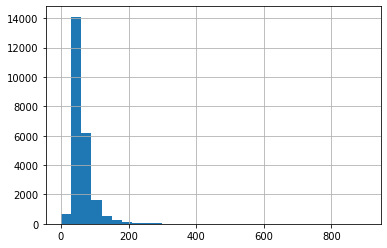

In [33]:
df['total_area'].hist(bins=30, range = (0, 900))

Видим, что чаще всего встречаются квартиры площадью до 100 квадратов, а пик на уровне 70 квадратов.

Рассмотрим, какая цена за квадратный метр чаще всего встречается.

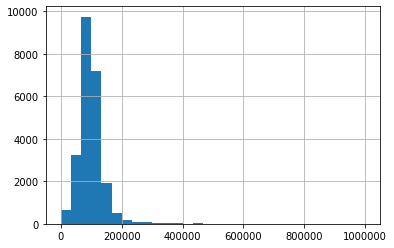

In [34]:
df['meter_price'].hist(bins=30, range = (0, 1000000))

Видим, что чаще всего встречается диапазон цены до 250 000, пик на уровне 80 000 - 120 000.

Теперь рассмотрим, какой ценовой диапазон чаще всего встрается.

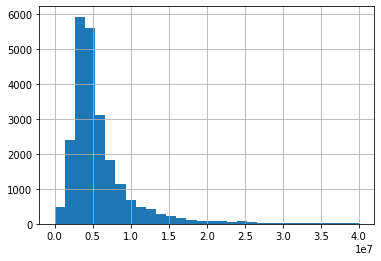

In [35]:
df['last_price'].hist(bins=30, range = (0, 40000000))

Видим, что пик приходит на диапазон 3-5 млн рублей, хвост тянется к 0 уже после 25 млн.

Посмотрим, сколько по времени были в поиске объявления до снятия (продажи).

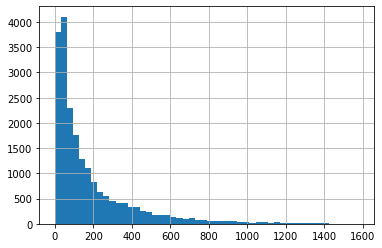

In [36]:
df['days_exposition'].hist(bins=50, range = (0, 1580))

Видим, что основной пик продаж приходит на первых 1-2 месяца, к 0 тянется после 1500 дней.

Посмотрим, сколько комнат чаще всего встречается в продаваемых квартирах.

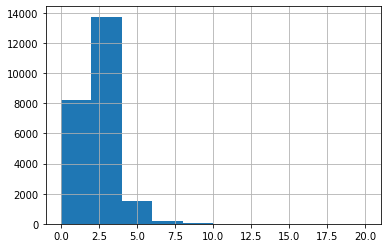

In [37]:
df['rooms'].hist(bins=10, range = (0, 20))

Видим, что чаще всего встречаются квартиры 1,2 и 3х комнатные, к 0 тянется после 10.

Создадим новую переменную *df_good*, где сохарним срез данных, который исключает аномильные показатели.

In [38]:
df_good = df.query('meter_price <= 250000 and last_price <= 25000000 and 1 <= days_exposition <= 1500 and 1 <= rooms <= 10') 


* Оставим стоимостью метра до 250 000, так как исходя из гистограмм, можно увидеть, что после этого диапазона показатели резко приближаются к нулю (количеству квартир)
* Цена за квартиру на до 25 млн, так как в гистрограмме именно после этого показетля к-ство квартир с более высокой ценой резко идут к 0.
* Дней публикации оставим на уровне от 1 - 1500 дней, так как владельцы могли долго выбирать подходящее предложение, то диапазон 1500 дней показывает, что такие владельцы попадются переодически, но те, что позже приближаются к 0.
* Количество компнат оставим на уровне от 1 до 10, так как 0 комнат нам ни о чем не скажут и на эти данные нельзя будет опираться, а больше 10 компнат попадается крайне редко из общего количества.

Посмотрим на отфильтрованную таблицу с данными.

In [39]:
df_good

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,total_kitchen,total_living,day,month,year,floor_type,prigorod_city
1,7,3350000,40.4,2018-12-04,1,nan,11,18.6,1,True,False,False,11.0,2,посёлок Шушары,12817,18603,0,NaN,0,NaN,81.0,"82,920.8",0.3,0.5,4,12,2018,первый,пригород
2,10,5196000,56.0,2015-08-20,2,nan,5,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558.0,"92,785.7",0.1,0.6,20,8,2015,другие,Санкт-Петербург
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,True,False,False,41.0,NaN,Санкт-Петербург,31856,8098,2,112,1,48,121.0,"100,000.0",0.4,0.3,19,6,2018,другие,Санкт-Петербург
5,10,2890000,30.4,2018-09-10,1,nan,12,14.4,5,True,False,False,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,"95,065.8",0.3,0.5,10,9,2018,другие,пригород
6,6,3700000,37.3,2017-11-02,1,nan,26,10.6,6,True,False,False,14.4,1,посёлок Парголово,52996,19143,0,NaN,0,NaN,155.0,"99,195.7",0.4,0.3,2,11,2017,другие,пригород
8,20,2900000,33.2,2018-05-23,1,nan,27,15.4,26,True,False,False,8.8,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,"87,454.8",0.3,0.5,23,5,2018,другие,пригород
9,18,5400000,61.0,2017-02-26,3,2.5,9,43.6,7,True,False,False,6.5,2,Санкт-Петербург,50898,15008,0,NaN,0,NaN,289.0,"88,524.6",0.1,0.7,26,2,2017,другие,Санкт-Петербург
10,5,5050000,39.6,2017-11-16,1,2.7,12,20.3,3,True,False,False,8.5,NaN,Санкт-Петербург,38357,13878,1,310,2,553,137.0,"127,525.3",0.2,0.5,16,11,2017,другие,Санкт-Петербург
11,9,3300000,44.0,2018-08-27,2,nan,5,31.0,4,False,False,False,6.0,1,Ломоносов,48252,51677,0,NaN,0,NaN,7.0,"75,000.0",0.1,0.7,27,8,2018,другие,пригород
12,10,3890000,54.0,2016-06-30,2,nan,5,30.0,5,True,False,False,9.0,0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0,"72,037.0",0.2,0.6,30,6,2016,последний,пригород


Какие факторы больше всего влияют на стоимость квартиры? Отдельно изучите, зависит ли цена квадратного метра от числа комнат, этажа (первого или последнего), удалённости от центра и даты размещения: дня недели, месяца и года.

## Какие факторы больше всего влияют на стоимость квартиры?

Рассмотрим, влияет ли отделённость от центра на стоимость квадратного метра.

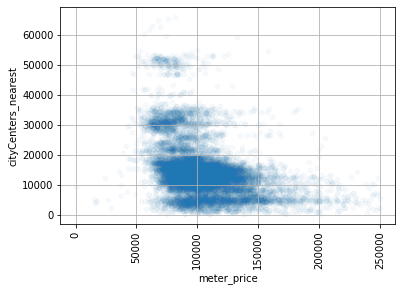

In [40]:
df_good.plot(x = 'meter_price', y = 'cityCenters_nearest', rot = 90, kind='scatter', alpha=0.033, grid=True)


Видим, что чем ближе к центру, тем дороже стоимость метра квартиры, особенно это заметно на пикак до 10 000 метров и цене с выпадом до 250 000 за метр.

Рассмотрим, влияет ли количество комнат в квартире на стоимость метра.

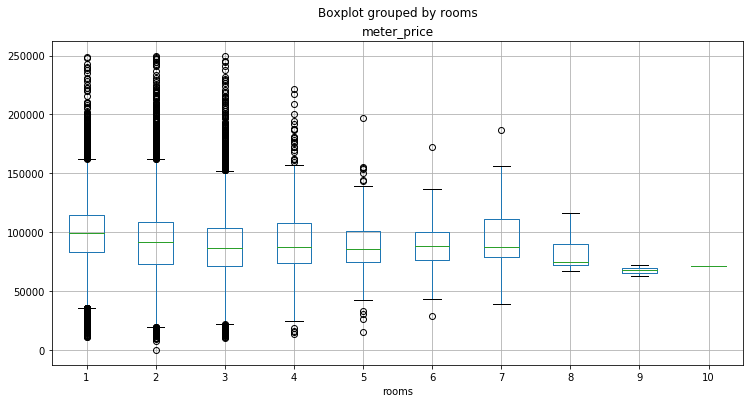

In [41]:
df_good.boxplot(column='meter_price', by='rooms', grid=True, figsize = (12, 6))


In [42]:
df_good.pivot_table(index = 'rooms' , values = 'meter_price', aggfunc = 'median')


,meter_price
rooms,
1,"99,728.6"
2,"91,435.8"
3,"87,102.2"
4,"87,333.3"
5,"86,278.6"
6,"88,486.8"
7,"87,749.2"
8,"74,673.4"
9,"67,652.3"


Видим, что однокомнатные квартиры дороже всех остальных, после идет немного спад в цене, что может значит - чем больше комнат, тем меньше цена за квадрат.

Рассмотрим завсимость цены от этажа квартиры.

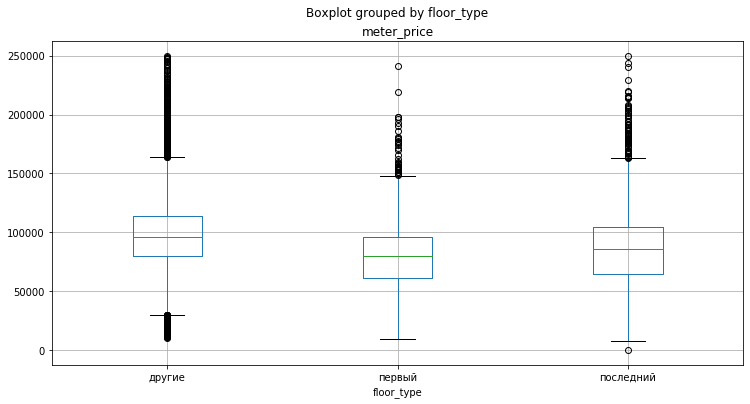

In [43]:
df_good.boxplot(column='meter_price', by='floor_type', grid=True, figsize = (12, 6))


Видим, что более дорогими за квадратный метр являются квартиры со второго и выше, исключая последний, то есть квартиры на первом и последнем этажам, стоят дешевле чем между ними.

Причиной этого может быть то, что первый этаж может быть менее безопасных для имущества, возможно повышенный уровень шума  и загазованности воздуха. Последний же этаж - могут быть проблемы с кришей и это сразу же отобразится на самой квартире, помимо это на верхним этажах температура выше, поэтому кондиционеры нужны более мощнее.

Рассмотрим, влияет ли год публикации объявления на стоимость метра.

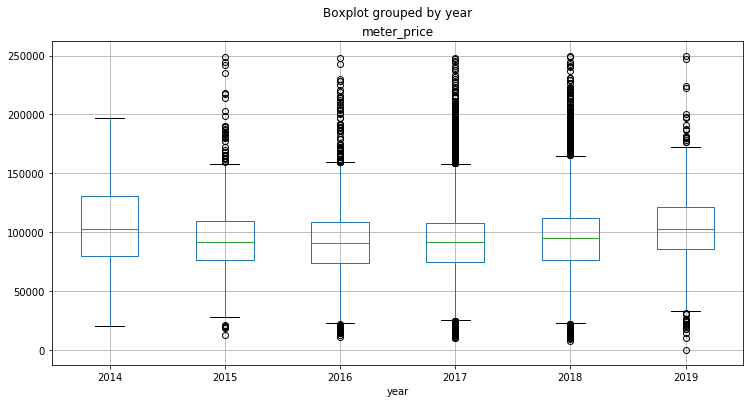

In [44]:
df_good.boxplot(column='meter_price', by='year', grid=True, figsize = (12, 6))


In [45]:
df_good.pivot_table(index = 'year', values = 'meter_price', aggfunc = 'median')


,meter_price
year,
2014,"102,861.0"
2015,"91,666.7"
2016,"90,899.0"
2017,"91,512.3"
2018,"94,965.7"
2019,"103,000.0"


Видим, что более дорогими за квадрат были квартиры в 2014 и 2019 году, но просели в цене в 2015-2017.

Рассмотрим, влияет ли месяц на стоимость метра.

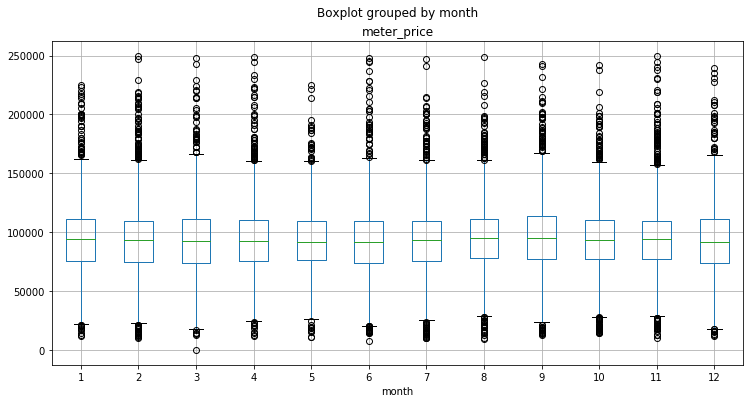

In [46]:
df_good.boxplot(column='meter_price', by='month', grid=True, figsize = (12, 6))


In [47]:
df_good.pivot_table(index = 'month', values = 'meter_price', aggfunc = 'median')


,meter_price
month,
1,"94,020.2"
2,"93,283.6"
3,"92,953.9"
4,"92,378.8"
5,"91,853.0"
6,"91,691.4"
7,"93,205.6"
8,"95,000.0"
9,"94,852.6"


Видим, что особо большой разницы нету, из общего выбиваются август и сентябрь, которые более высокие в цене за квадрат.

Рассмотрим, влияет ли день месяца на стоимость квадрата квартиры.

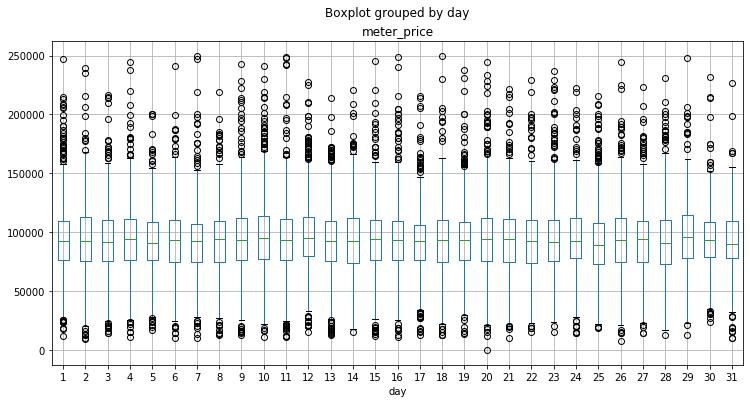

In [48]:
df_good.boxplot(column='meter_price', by='day', grid=True, figsize = (12, 6))


In [49]:
df_good.pivot_table(index = 'day', values = 'meter_price', aggfunc = 'median')


,meter_price
day,
1,"92,963.2"
2,"93,000.7"
3,"91,812.6"
4,"93,999.7"
5,"91,222.5"
6,"93,556.2"
7,"92,242.4"
8,"94,482.5"
9,"93,557.7"


Видим, что в данном случае стоимость не столь меняется, так что можно предположить, что день не столь значителен и не сильно влияет на стоимость.

Создадим переменую *prigorod_sum* и подсчитаем стоимость квадратного метра в Санкт-Петербурге и пригороде.

In [50]:
prigorod_sum = df_good.pivot_table(index = 'prigorod_city', values = 'meter_price', aggfunc = 'median')


In [51]:
prigorod_sum

,meter_price
prigorod_city,
Санкт-Петербург,"102,259.0"
пригород,"69,131.1"


Как видим, стоимость в Санкт-Петербурге существенно выше пригорода.

Создадим переменную в которую сохраним города из пригорода.

In [52]:
df_prigporod_city = df_good[(df_good['locality_name'] != "Санкт-Петербург")]

Так же отдельно сохраним только строки с Санкт-Петербургом.

In [53]:
df_spb = df_good[(df_good['locality_name'] == "Санкт-Петербург")]

В переменную *prigorod_city* сохраним города в пригороде из наибольшим к-ством объявлений.

In [54]:
prigorod_city = df_prigporod_city.pivot_table(index = 'locality_name', values = 'meter_price', aggfunc='count')



Выведим 10 городов по убыванию объявлений.

In [55]:
prigorod_city.sort_values(by = 'meter_price', ascending = False).head(10)




,meter_price
locality_name,
посёлок Мурино,490
посёлок Шушары,404
Всеволожск,334
Колпино,307
Пушкин,300
посёлок Парголово,298
деревня Кудрово,283
Гатчина,268
Выборг,208


Выведим статистические показатели по пригороду.

In [56]:
df_prigporod_city.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,total_kitchen,total_living,day,month,year
count,"6,788.0","6,788.0","6,788.0","6,788.0","3,617.0","6,774.0","6,098.0","6,788.0","6,025.0","3,673.0","2,235.0","2,235.0","2,235.0",702.0,"2,235.0",999.0,"6,788.0","6,788.0","6,025.0","6,098.0","6,788.0","6,788.0","6,788.0"
mean,9.0,"3,489,962.9",51.1,1.9,2.7,9.5,28.8,5.3,9.3,1.1,"33,503.8","30,068.4",0.5,416.3,0.8,502.0,177.3,"69,058.3",0.2,0.6,15.4,6.5,"2,017.2"
std,5.5,"1,878,222.9",19.4,0.9,1.0,6.9,13.1,4.9,3.8,1.0,"17,191.2","9,378.9",0.9,296.3,1.0,255.8,208.0,"24,099.6",0.1,0.1,8.6,3.5,0.9
min,0.0,"430,000.0",15.0,1.0,1.2,1.0,8.4,1.0,2.3,0.0,"9,294.0","1,322.0",0.0,4.0,0.0,35.0,3.0,"7,963.0",0.1,0.1,1.0,1.0,"2,014.0"
25%,5.0,"2,400,000.0",37.0,1.0,2.5,5.0,17.8,2.0,6.9,0.0,"18,635.0","23,986.0",0.0,228.0,0.0,309.0,45.0,"53,194.1",0.1,0.5,8.0,3.0,"2,017.0"
50%,9.0,"3,200,000.0",46.2,2.0,2.6,5.0,28.0,4.0,9.0,1.0,"26,634.0","30,275.0",0.0,374.5,0.0,489.0,97.0,"69,131.1",0.2,0.6,15.0,7.0,"2,017.0"
75%,13.0,"4,200,000.0",60.0,2.0,2.7,12.0,36.0,7.0,10.9,2.0,"52,610.0","33,517.0",1.0,531.0,1.0,659.5,233.0,"84,870.5",0.2,0.6,23.0,10.0,"2,018.0"
max,39.0,"24,800,000.0",320.0,7.0,27.0,60.0,190.0,27.0,64.0,5.0,"84,869.0","65,968.0",3.0,"2,131.0",3.0,"1,344.0","1,489.0","204,451.8",0.7,1.0,31.0,12.0,"2,019.0"


Выведим статистические показатели по Санкт-Петербургу.

In [57]:
df_spb.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,total_kitchen,total_living,day,month,year
count,"13,155.0","13,155.0","13,155.0","13,155.0","8,107.0","13,096.0","12,198.0","13,155.0","12,068.0","7,106.0","13,119.0","13,137.0","13,137.0","5,924.0","13,137.0","6,546.0","13,155.0","13,155.0","12,068.0","12,198.0","13,155.0","13,155.0","13,155.0"
mean,9.9,"6,399,973.0",59.6,2.1,2.8,11.6,34.1,6.3,10.5,1.1,"28,141.0","11,855.7",0.6,502.2,0.7,528.6,179.8,"107,241.1",0.2,0.6,15.4,6.6,"2,017.2"
std,5.7,"3,542,628.4",27.7,1.0,0.8,6.4,18.5,4.9,5.2,1.1,"11,731.7","4,723.6",0.8,349.6,0.9,280.0,221.0,"26,494.7",0.1,0.1,8.6,3.5,1.0
min,0.0,"12,190.0",12.0,1.0,1.0,1.0,2.0,1.0,2.0,0.0,0.0,208.0,0.0,1.0,0.0,13.0,1.0,111.8,0.0,0.0,1.0,1.0,"2,014.0"
25%,6.0,"4,100,000.0",41.0,1.0,2.5,6.0,19.0,3.0,7.1,0.0,"18,265.0","8,936.0",0.0,301.0,0.0,307.0,42.0,"89,456.9",0.1,0.5,8.0,3.0,"2,017.0"
50%,9.0,"5,250,000.0",52.8,2.0,2.7,9.0,30.5,5.0,9.5,1.0,"26,980.0","12,430.0",0.0,460.0,0.0,515.0,94.0,"102,259.0",0.2,0.6,15.0,7.0,"2,017.0"
75%,14.0,"7,449,000.0",70.0,3.0,2.8,16.0,42.7,9.0,12.0,2.0,"36,813.0","15,018.0",1.0,622.0,1.0,751.0,226.0,"119,617.0",0.2,0.6,23.0,10.0,"2,018.0"
max,50.0,"25,000,000.0",460.8,10.0,27.5,52.0,279.6,33.0,100.7,5.0,"54,784.0","29,493.0",3.0,"3,190.0",3.0,"1,337.0","1,497.0","250,000.0",0.8,1.0,31.0,12.0,"2,019.0"


Видим, что основные показатели сильно отличаются между Санкт-Петербургом и пригороду.

Выделите сегменты типичных квартир в центре (по удалённости, числу комнат и площади) и вне центра. Границы определите самостоятельно. Выберите достаточно крупные сегменты с не менее 1000 объявлений. Сравните корреляцию основных факторов с ценой по всем предложениям и объявлениям в вашей выборке.

Выведим типичный парметр по удалённости для пригорода.

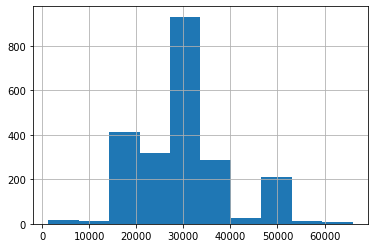

In [58]:
df_good.query('locality_name != "Санкт-Петербург"')['cityCenters_nearest'].hist()


Видим, что большинство находится в диапазоне на уровне 15 000 - 40 000 метров, пик на уровне 28 000 - 33 000 метров.

Выведим типичный парметр по комнатам для пригорода.

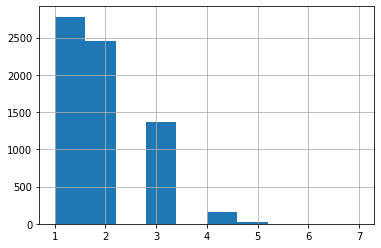

In [59]:
df_good.query('locality_name != "Санкт-Петербург"')['rooms'].hist()


Видем, что в большинстве случаев продаются 1-2х комнатные, изредка 3х.

Выведим типичный парметр по общей площади для пригорода.

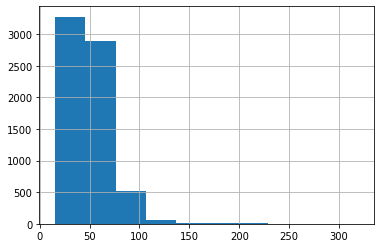

In [60]:
df_good.query('locality_name != "Санкт-Петербург"')['total_area'].hist()


Видим, что большинство квартир в диапазоне от 25 - 100 квадратов, пик на уровне 25-70 квадратов.

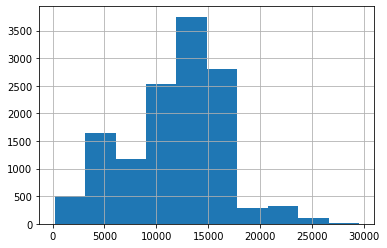

In [61]:
df_good.query('locality_name == "Санкт-Петербург"')['cityCenters_nearest'].hist()


Выведим типичный парметр по комнатам для Санкт-Петербурга.

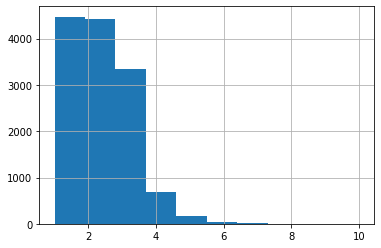

In [62]:
df_good.query('locality_name == "Санкт-Петербург"')['rooms'].hist()


Видим, что чаще всего встречаются 1 и 3х комнатные квартиры.

Выведим типичный парметр по общей площади для Санкт-Петербурга.

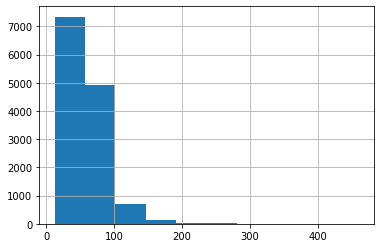

In [63]:
df_good.query('locality_name == "Санкт-Петербург"')['total_area'].hist()


Видим, что чаще всего встречается площадь от 25-100 квадратов, с пиком на уровне 25-60 квадратов.

### Сравним корреляцию основных факторов с ценой

Сравним корреляцию цены за квадрат и общей площадью квартиры.

In [64]:
df_good['meter_price'].corr(df_good['total_area'])


0.083047394624335

Показатель сильно приближён к 0, что говорит о, что площадь слабо и редко влияет на стоимость квадрата.

Сравним корреляцию цены за квадрат и колличеством комнат.

In [75]:
df_good['meter_price'].corr(df_good['rooms'])

-0.10911579305661383

Показатель отрицательный, что может говорить о том, что чем больше кол-ство комнат, тем ниже цена квадрата, но учитывая, что данный показатель не столь высок, значит это бывает не во всех случаях или же уменьшение цены незначительное.

Сравним корреляцию цены за квадрат и площадью кухни.

In [66]:
df_good['meter_price'].corr(df_good['kitchen_area'])

0.29913621707260385

Показатель положительный, значит чем больше площадь кухни, тем больше цена квадратного метра квартиры.

Сравним корреляцию цены за квадрат и этажем квартиры.

In [87]:
df_good['meter_price'].corr(df_good['floor'])

0.21673976634484907

Видим, что показатель так же положительный, что говорит о том, что этаж квартиры влияет на стоимость квартиры, но всё зависит от того, какой именно.

### Подберем наиболее характерные параметры для апартаментов, студий и квартир свободной планировки и выясним - влияют ли они на цену? 

Выведим медиану для квартир со свободной планировкой.

In [91]:
open_plan = df_good.query('open_plan == True and is_apartment == False and studio == False')
open_plan['last_price'].median()

4745000.0

Выведим медиану для квартир апартаментов.

In [90]:
apartment = df_good.query('open_plan == False and is_apartment == True and studio == False')
apartment['last_price'].median()

4500000.0

Выведим медиану для квартир студий.

In [69]:
studio = df_good.query('open_plan == False and is_apartment == False and studio == True')
studio['last_price'].median()


2675000.0

Видим, что более дорогие квартиры со свободной планировкой, далее идут апартаменты и самые дешевые студии.



Выведим для данных категорий значения, которые больше всего влияют на стоимость квадратного метра. 

In [70]:
apartment = df_good.query('is_apartment == True')
studio = df_good.query('studio == True')
open_plan = df_good.query('open_plan == True')




### Проведем корреляцию для апартаментов

In [71]:
corr = apartment.corr()
a = corr.reset_index()
a = a.query('index == "meter_price"')
a

,index,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,total_kitchen,total_living,day,month,year
20,meter_price,0.1,0.6,0.1,-0.1,0.1,0.3,-0.0,0.2,nan,0.0,-0.0,0.3,0.1,-0.0,-0.4,0.1,0.1,0.1,-0.1,0.0,1.0,0.3,-0.2,0.0,0.0,0.0


Видим, что больше всех влияют:
* Общее кол-ство этажей в доме
* Этаж квартиры
* Площадь кухни
* Расстояние от центра

### Проведем корреляцию для студий

In [92]:
corr = studio.corr()
a = a.reset_index()
a = a.query('index == "meter_price"')
a

,level_0,index,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,total_kitchen,total_living,day,month,year
0,20,meter_price,-0.4,0.6,0.2,-0.1,0.9,0.4,0.1,0.4,-0.5,nan,nan,nan,-0.3,-0.5,-0.5,-0.3,nan,-0.7,-1.0,-0.3,1.0,nan,-0.3,-0.8,0.5,0.0


Видим, что больше всех влияют:
* Общее кол-ство этажей в доме
* Этаж квартиры
* Высота потолков
* Расстояние от центра и аэропорта
* Месяц публикации объявления
* Кол-ство в 3 км и ближайшие водоёмы

### Проведем корреляцию для свободной планировки

In [94]:
corr = open_plan.corr()
a = corr.reset_index()
a = a.query('index == "meter_price"')
a

,index,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,total_kitchen,total_living,day,month,year
20,meter_price,-0.9,0.6,0.2,-0.2,0.9,0.5,0.0,0.7,nan,nan,nan,nan,-0.1,-0.5,-0.5,-0.3,nan,-0.7,-1.0,0.3,1.0,nan,-0.4,-0.8,0.4,-0.3


Видим, что больше всех влияют:
* Общее кол-ство этажей в доме
* Этаж квартиры
* Высота потолков
* Расстояние от центра и аэропорта
* Кол-ство в 3 км и ближайшие водоёмы

# Общие выводы с анализа по исследованию объявлений о продаже квартир

Основная проблема в расчётах была в отсутствии большого количества значений во многих столбцах, поэтому доводилось пользоваться срезами и фильтрами для получения наиболее точной информации и выводов.

Выводы с работы можно сделать следующие:
* Количество комнат в квартире влияет на стоимость квадртатного метра - чем больше комнат, тем дешевле общая цена квадратного метра;
* На цену влияет этаж квартиры, мы проанализировали и отметили, что более дешевыми чаще всего бывают квартиры на первом и последнем этажах. Причиной этого может быть то, что первый этаж может быть менее безопасных для имущества, возможно повышенный уровень шума  и загазованности воздуха. Последний же этаж - могут быть проблемы с кришей и это сразу же отобразится на самой квартире, помимо это на верхним этажах температура выше, поэтому кондиционеры нужны более мощнее.
* Определили, что на цену квартир влияет площадь кухни, скорее всего это связано с тем, что чем больше кухня, тем больше жилая площадь.
* Определили, что чем ближе квартира к центру, тем дороже квадртаный метр. Связанно это может быть с удобством инфраструктуры или же транспортных развязок.
* Определили, что в 2014 и 2019 годах стоимость квадратного метра самые высокие, а 2016 год был в этом промежутке самым низким по стоимости.
* В пригороде чаще всего публикуют объявления о продаже квартир в посёлоке Мурино и Шушары.	
* Определили, что цена квадратного метра в Санкт-Петербурге более 100 000 руб, а в пригороде почти 70 000 руб.
* Определили, что квартиры в большей продаются на протяжении до 100 дней и чаще всего в первые 60 дней.
* Чаще всего продают квартиры 1,2х компнтаные, в пригороде так же часто встречаются 3х коматные.
* Большего всего квартир находится в диапазоне цены 3 - 5 млн руб.
* Чаще всего метраж квартир до 100 метров и пик на уровне 70 квадратов.
* Выяснили, что квартиры со свободной планировкой более дороже, а студии самые дешевые.
* Выяснили что для студий и квартир со свободной планировкой важно кол-ство водоёмов и расстояние к ним, помимо это расстояние от центра и аэропорта, а так же высота потолков.